# Signed network

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import itertools

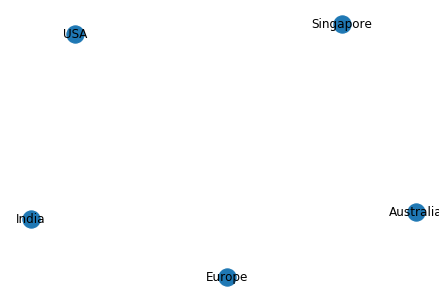

In [2]:
G=nx.Graph()
n=5
mapping={1:"India",2:"USA",3:"Singapore",4:"Australia",5:"Europe"}
G.add_nodes_from([i for i in range(1,n+1)])
G = nx.relabel_nodes(G,mapping)
nx.draw(G,with_labels=True)
plt.show()

In [3]:
signs = ['+','-']
for u in G.nodes():
    for v in G.nodes():
        if u != v:
            G.add_edge(u,v,sign=random.choice(signs))

{('India', 'USA'): '+', ('India', 'Singapore'): '-', ('India', 'Australia'): '-', ('India', 'Europe'): '+', ('USA', 'Singapore'): '+', ('USA', 'Australia'): '+', ('USA', 'Europe'): '-', ('Singapore', 'Australia'): '-', ('Singapore', 'Europe'): '+', ('Australia', 'Europe'): '-'}


C:\Users\Sachin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


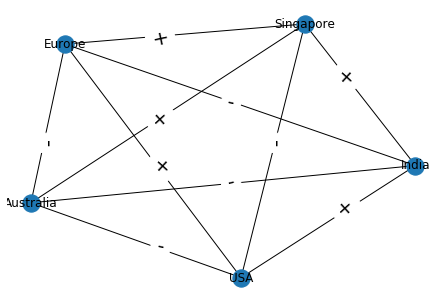

In [4]:
pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G,'sign')
print(edge_labels)
nx.draw(G,with_labels=True)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_size=20)
plt.show()

In [5]:
nodes = G.nodes()
triangles = [list(x) for x in itertools.combinations(nodes,3)]
print(triangles)

[['India', 'USA', 'Singapore'], ['India', 'USA', 'Australia'], ['India', 'USA', 'Europe'], ['India', 'Singapore', 'Australia'], ['India', 'Singapore', 'Europe'], ['India', 'Australia', 'Europe'], ['USA', 'Singapore', 'Australia'], ['USA', 'Singapore', 'Europe'], ['USA', 'Australia', 'Europe'], ['Singapore', 'Australia', 'Europe']]


In [6]:
def get_signs_of_all_triangles(triangles,G):
    all_signs = []
    for i in range(len(triangles)):
        temp = []
        temp.append(G[triangles[i][0]][triangles[i][1]]['sign'])
        temp.append(G[triangles[i][1]][triangles[i][2]]['sign'])
        temp.append(G[triangles[i][2]][triangles[i][0]]['sign'])
        all_signs.append(temp)
    return all_signs

In [7]:
all_signs = get_signs_of_all_triangles(triangles,G)
print(all_signs)

[['+', '+', '-'], ['+', '+', '-'], ['+', '-', '+'], ['-', '-', '-'], ['-', '+', '+'], ['-', '-', '+'], ['+', '-', '+'], ['+', '+', '-'], ['+', '-', '-'], ['-', '-', '+']]


In [8]:
def  count_unstable(all_signs):
    stable = 0
    unstable = 0
    for i in range(len(all_signs)):
        if all_signs[i].count('+') == 3 or all_signs[i].count('+') == 1:
            print(all_signs[i])
            stable = stable+1
        else:
            unstable = unstable+1
    print("Stable traingles =",stable)
    print("Unstable traingles =",unstable)
    return unstable

In [9]:
unstable = count_unstable(all_signs)

['-', '-', '+']
['+', '-', '-']
['-', '-', '+']
Stable traingles = 3
Unstable traingles = 7


In [10]:
def convert_unstable_to_stable(G,triangles,all_signs):
    all_signs = []
    for i in range(len(triangles)):
        temp = []
        temp.append(G[triangles[i][0]][triangles[i][1]]['sign'])
        temp.append(G[triangles[i][1]][triangles[i][2]]['sign'])
        temp.append(G[triangles[i][2]][triangles[i][0]]['sign'])
        all_signs.append(temp)
        if all_signs[i].count('+') == 2:
            if(G[triangles[i][0]][triangles[i][1]]['sign'] == '-'):
                print(triangles[i][0],triangles[i][1])
                G.remove_edge(triangles[i][0],triangles[i][1])
                G.add_edge(triangles[i][0],triangles[i][1],sign ='+')
            elif(G[triangles[i][1]][triangles[i][2]]['sign'] == '-'): 
                G.remove_edge(triangles[i][1],triangles[i][2])
                G.add_edge(triangles[i][1],triangles[i][2],sign = '+')
            elif(G[triangles[i][2]][triangles[i][0]]['sign'] == '-'):
                G.remove_edge(triangles[i][2],triangles[i][0])
                G.add_edge(triangles[i][2],triangles[i][0],sign ='+')
        if all_signs[i].count('+') == 0:
            if(G[triangles[i][0]][triangles[i][1]]['sign'] == '-'):
                G.remove_edge(triangles[i][0],triangles[i][1])
                G.add_edge(triangles[i][0],triangles[i][1],sign = '+')
                break
            elif(G[triangles[i][1]][triangles[i][2]]['sign'] == '-'): 
                G.remove_edge(triangles[i][1],triangles[i][2])
                G.add_edge(triangles[i][1],triangles[i][2],sign = '+')
                break
            elif(G[triangles[i][2]][triangles[i][0]]['sign'] == '-'):
                G.remove_edge(triangles[i][2],triangles[i][0])
                G.add_edge(triangles[i][2],triangles[i][0],sign = '+')

In [11]:
while unstable !=0:
    print("Unstable Count =",unstable)
    convert_unstable_to_stable(G,triangles,all_signs)
    all_signs = get_signs_of_all_triangles(triangles,G)
    unstable = count_unstable(all_signs)

Unstable Count = 7
['+', '+', '+']
['+', '+', '+']
['+', '+', '+']
['+', '+', '+']
['+', '+', '+']
['+', '+', '+']
['+', '+', '+']
['+', '+', '+']
['+', '+', '+']
['+', '+', '+']
Stable traingles = 10
Unstable traingles = 0
